In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import modules
import tensorflow as tf
from __future__ import print_function
import numpy as np
from model_tf import deblur_model
import argparse
from utils import load_images, load_own_images, deprocess_image
import os
import h5py
import matplotlib.pyplot as plt

E:\Program\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Load data

In [2]:
cache_file = 'train_cache_demon.hdf5'
image_dir = './images'

if os.path.exists(cache_file):
    h5f = h5py.File(cache_file,'r')
    train_data = {'A':h5f['A'][:], 'B':h5f['B'][:]}
else:
    train_data = load_images(os.path.join(image_dir, "train"),n_images=-1)
    h5f = h5py.File(cache_file, 'w')
    h5f.create_dataset('A', data=train_data['A'])
    h5f.create_dataset('B', data=train_data['B'])
    h5f.close()

In [3]:
parser = argparse.ArgumentParser(description="deblur train")
parser.add_argument("--g_input_size", help="Generator input size of the image", default=256,type=int)
parser.add_argument('--output_nc', type=int, default=3, help='# of output image channels')
parser.add_argument('--ngf', type=int, default=64, help='# of gen filters in first conv layer')
parser.add_argument('--ndf', type=int, default=64, help='# of discrim filters in first conv layer')
parser.add_argument('--n_downsampling', type=int, default=2, help='# of downsampling in generator')
parser.add_argument('--n_blocks_gen', type=int, default=9, help='# of res block in generator')
parser.add_argument('--d_input_size', type=int, default=256, help='Generator input size')
parser.add_argument('--kernel_size', type=int, default=4, help='kernel size factor in discriminator')
parser.add_argument('--n_layers_D', type=int, default=3, help='only used if which_model_netD==n_layers')
parser.add_argument('--LAMBDA_A', default=100000, type=int, help='The lambda for preceptual loss')
parser.add_argument('--g_train_num', default=0, type=int, help='Train the generator for x epoch before adding discriminator')

param = parser.parse_args(args='')

## train model

In [4]:
tf.reset_default_graph()
model = deblur_model(param)

In [5]:
# The model training here is just for demonstration,
# whose data size is very small, only with 20 pictures.
# To train the full model please use the full data
model.train(train_data, 
            batch_size=2, 
            pre_trained_model=None, 
            save_freq = 200,
            epoch_num = 10,
            generate_image_freq = 50)

1/9 batch in 2/10 epochs, discriminator loss: 2.968991279602051, generator loss: 1.1652395725250244
2/9 batch in 3/10 epochs, discriminator loss: 2.1877803802490234, generator loss: 0.5739922523498535
3/9 batch in 4/10 epochs, discriminator loss: 1.1657487154006958, generator loss: 0.6263291835784912
4/9 batch in 5/10 epochs, discriminator loss: 0.9338668584823608, generator loss: 0.5685501098632812
5/9 batch in 6/10 epochs, discriminator loss: 0.913151741027832, generator loss: 0.34511831402778625
image saved to deblur_train/Deblur_1525616361
6/9 batch in 7/10 epochs, discriminator loss: 0.7629618644714355, generator loss: 0.47659242153167725
7/9 batch in 8/10 epochs, discriminator loss: 0.6859221458435059, generator loss: 0.28979483246803284
8/9 batch in 9/10 epochs, discriminator loss: 0.6871048212051392, generator loss: 0.29550063610076904
9/9 batch in 10/10 epochs, discriminator loss: 0.6683633327484131, generator loss: 0.2617829144001007
Deblur_1525616361 Saved


## test model

In [6]:
test_data = load_images(os.path.join(image_dir, "test"), n_images=20)

In [8]:
# please replace your model name
model_name = 'Deblur_1525566261'
test_deblured_img = model.generate(test_data, batch_size=2, trained_model=model_name, save=False)

Load the model from: Deblur_1525566261
INFO:tensorflow:Restoring parameters from model/Deblur_1525566261
Model restored.
PSNR of testing data: 25.42892702063694


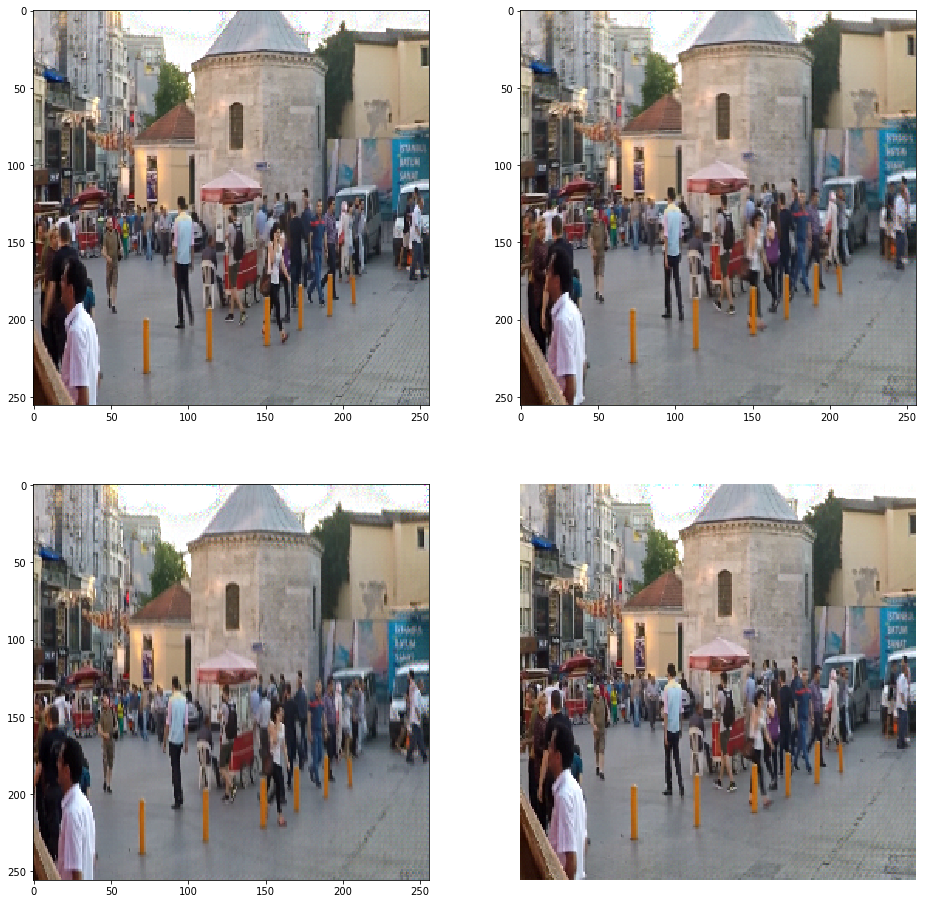

In [9]:
num_show = 4
mask = np.random.choice(test_deblured_img.shape[0], num_show, replace=False)
X_show = test_deblured_img[mask,:,:,:]
r = 2
f, axarr = plt.subplots(r, r, figsize=(16,16))
plt.axis("off")
for i in range(r):
    for j in range(r):
        #print(image.shape)
        image = X_show[r*i+j]
        axarr[i][j].imshow(image)

## Debluring customized data

In [10]:
customized_data = load_own_images(os.path.join(image_dir, "own"), n_images=-1)

In [12]:
# please replace your model name
model_name = 'Deblur_1525566261'
customized_deblured_img = model.generate(customized_data,
                                         batch_size=1, 
                                         trained_model=model_name, 
                                         customized=True,
                                         save=False)

Load the model from: Deblur_1525566261
INFO:tensorflow:Restoring parameters from model/Deblur_1525566261
Model restored.


In [20]:
img_show = np.concatenate((customized_deblured_img, deprocess_image(customized_data)), axis=1)

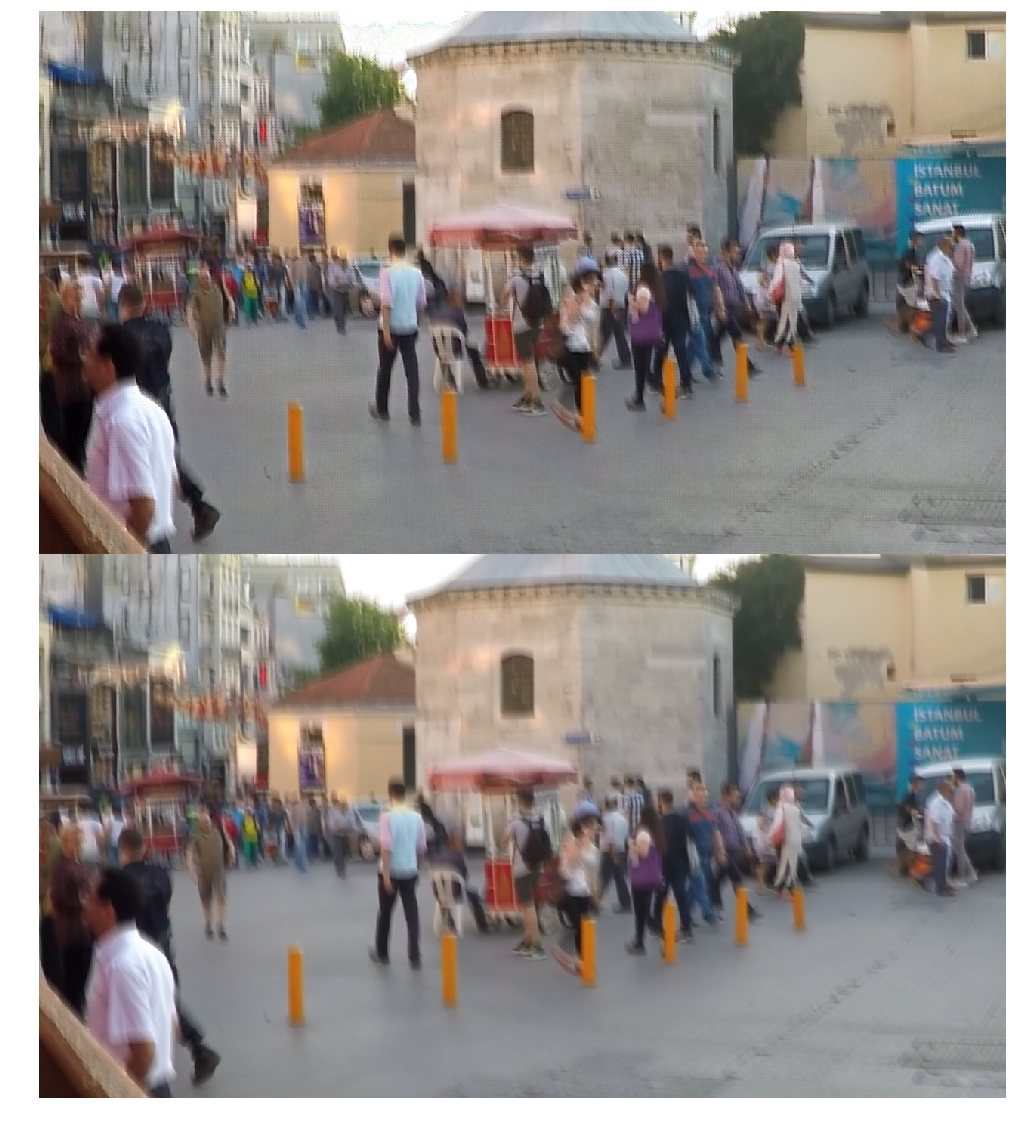

In [23]:
plt.figure(figsize = (20,20))
plt.axis("off")
plt.imshow(img_show[2])
plt.show()